In [1]:
import os
os.chdir('/Users/Sinead/DC-project/')
import matplotlib
import matplotlib.pyplot as plt
plt.ioff()
import numpy as np
import script
import plotly 
plotly.offline.init_notebook_mode()
import find_eyes_reshape as fer
import nibabel as nib
import vtk
import pylab

/Users/Sinead/anaconda/envs/project/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
PathDicoms = np.array(
    [['/Volumes/Backup Data/ASDH Samples/Sample1/Post-operative/R-N11-109/HeadSpi  1.0  J40s  3', 'Sample-1'],
     ['/Volumes/Backup Data/ASDH Samples/Sample2/Original/Post-op.nii', 'Sample-2'],
     ['/Volumes/Backup Data/ASDH Samples/Sample3/Post-op', 'Sample-3'],
     ['/Volumes/Backup Data/ASDH Samples/Sample4/Post-op', 'Sample-4'],
     ['/Volumes/Backup Data/ASDH Samples/Sample5/Post-op', 'Sample-5'],
     ['/Volumes/Backup Data/ASDH Samples/SampleA/Post-op', 'Sample-A'],
     ['/Volumes/Backup Data/ASDH Samples/SampleB/Post-op', 'Sample-B'],
     ['/Volumes/Backup Data/ASDH Samples/SampleC/Post-op', 'Sample-C'],
     ['/Volumes/Backup Data/ASDH Samples/SampleD/Post-op', 'Sample-D'],
     ['/Volumes/Backup Data/ASDH Samples/SampleF/Post-op', 'Sample-F'],
     ['/Volumes/Backup Data/ASDH Samples/SampleG/Post-op', 'Sample-G'],
     ['/Volumes/Backup Data/ASDH Samples/SampleH/Post-op', 'Sample-H'],
     ['/Volumes/Backup Data/ASDH Samples/SampleI/Post-op', 'Sample-I']])

In [2]:
PathDicoms = np.array(
    [['/Volumes/Backup Data/ASDH Samples/Sample1/Pre-operative/R-N11-109/HeadSpi  1.0  J40s  3', 'Sample 1'],
     ['/Volumes/Backup Data/ASDH Samples/Sample2/Original/Pre-op.nii', 'Sample 2'],
     ['/Volumes/Backup Data/ASDH Samples/Sample3/Pre-op', 'Sample 3'],
     ['/Volumes/Backup Data/ASDH Samples/Sample4/Pre-op', 'Sample 4'],
     ['/Volumes/Backup Data/ASDH Samples/Sample5/Pre-op', 'Sample 5'],
     ['/Volumes/Backup Data/ASDH Samples/SampleA/Pre-op', 'Sample A'],
     ['/Volumes/Backup Data/ASDH Samples/SampleB/Pre-op', 'Sample B'],
     ['/Volumes/Backup Data/ASDH Samples/SampleC/Pre-op', 'Sample C'],
     ['/Volumes/Backup Data/ASDH Samples/SampleD/Pre-op', 'Sample D'],
     ['/Volumes/Backup Data/ASDH Samples/SampleF/Pre-op', 'Sample F'],
     ['/Volumes/Backup Data/ASDH Samples/SampleG/Pre-op', 'Sample G'],
     ['/Volumes/Backup Data/ASDH Samples/SampleH/Pre-op', 'Sample H'],
     ['/Volumes/Backup Data/ASDH Samples/SampleI/Pre-op', 'Sample I']])

In [5]:
def unskew(Pathdicom, samp):

# threshold CT scan for eyes and bone and store in 2 different arrays
    if PathDicom.endswith('.nii'):
        thresholded_eyes = script.threshim_nii(0,80) # remove soft tissue
        array_eyes, ConstPixelSpacing = script.vtk2np_nii(thresholded_eyes)
        array_visual, ConstPixelSpacing = script.nii2np()
    else:
        thresholded_eyes = script.threshim_dicom(0,80) # remove soft tissue
        array_eyes, ConstPixelSpacing = script.vtk2np(thresholded_eyes)
        array_visual, ConstPixelSpacing = script.dicom2np()

    print '{} thresholding complete'.format(samp)
    # reshape the arrays - don't run this twice
    array_eyes = script.reshape(array_eyes, ConstPixelSpacing, 220, 160, array_eyes.shape[0], array_eyes.shape[2])
    array_visual = script.reshape(array_visual, ConstPixelSpacing, 220, 160, array_visual.shape[0], array_visual.shape[2])
    print '{} reshaping complete'.format(samp)
    H, edges, data, hist_data_2c = fer.hist3d_all(array_eyes)
    ranges_1, ranges_2, certainty = fer.ranges(H,edges)
    c1,c2 = fer.coords(hist_data_2c, ranges_1, ranges_2)
    print '{} eyes found'.format(samp)
    # fer.check_coords(c1,c2,array_eyes)
    angle1, angle2 = fer.angles_from_eyes(c1,c2)
    _, array_visual = fer.correct_skews(angle1,angle2,array_visual)
    _, array_eyes = fer.correct_skews(angle1,angle2,array_eyes)
    print '{} skews corrected'.format(samp)
    
    return array_visual

In [19]:
print PathDicoms[8][1]

Sample D


In [43]:
# check eyes
PathDicom = PathDicoms[8][0]
if PathDicom.endswith('.nii'):
    thresholded_eyes = script.threshim_nii(0,80) # remove soft tissue
    array_eyes, ConstPixelSpacing = script.vtk2np_nii(thresholded_eyes)
    array_visual, ConstPixelSpacing = script.nii2np()
else:
    thresholded_eyes = script.threshim_dicom(0,80) # remove soft tissue
    array_eyes, ConstPixelSpacing = script.vtk2np(thresholded_eyes)
    array_visual, ConstPixelSpacing = script.dicom2np()

In [8]:
reload(fer)
# for i in range(0, PathDicoms.shape[0], 1):
for i in range(12):
    PathDicom = PathDicoms[i][0]
    samp = PathDicoms[i][1]
    array = unskew(PathDicom, samp)
    img = nib.Nifti1Image(array, np.eye(4))
    nib.save(img, '{}.nii.gz'.format(samp))

Sample 1 thresholding complete
Sample 1 reshaping complete
Optimization terminated successfully.
         Current function value: -23.033431
         Iterations: 39
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: -24.322859
         Iterations: 40
         Function evaluations: 80
Sample 1 eyes found
Sample 1 skews corrected
Sample 2 thresholding complete
Sample 2 reshaping complete
Optimization terminated successfully.
         Current function value: -22.951338
         Iterations: 39
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: -22.941456
         Iterations: 40
         Function evaluations: 80
Sample 2 eyes found
Sample 2 skews corrected
Sample 3 thresholding complete
Sample 3 reshaping complete
Optimization terminated successfully.
         Current function value: -24.271860
         Iterations: 41
         Function evaluations: 82
Optimization terminated successfu

/Users/Sinead/anaconda/envs/project/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning:

Polyfit may be poorly conditioned



Sample 3 skews corrected
Sample 4 thresholding complete
Sample 4 reshaping complete
Optimization terminated successfully.
         Current function value: -23.023087
         Iterations: 40
         Function evaluations: 80
Sample 4 eyes found
Sample 4 skews corrected
Sample 5 thresholding complete
Sample 5 reshaping complete
Optimization terminated successfully.
         Current function value: -24.649873
         Iterations: 40
         Function evaluations: 80
Sample 5 eyes found
Sample 5 skews corrected
Sample A thresholding complete
Sample A reshaping complete
Optimization terminated successfully.
         Current function value: -20.408331
         Iterations: 3
         Function evaluations: 8
Optimization terminated successfully.
         Current function value: -14.230249
         Iterations: 3
         Function evaluations: 8
Sample A eyes found
Sample A skews corrected
Sample B thresholding complete
Sample B reshaping complete
Sample B eyes found
Sample B skews corrected
Sam

/Users/Sinead/anaconda/envs/project/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning:

Polyfit may be poorly conditioned



Sample H skews corrected


# fixing sample D

In [45]:
array_eyes.shape

(512, 512, 243)

In [46]:
samp = PathDicoms[8][1]
print '{} thresholding complete'.format(samp)
# reshape the arrays - don't run this twice
array_eyes = script.reshape(array_eyes, ConstPixelSpacing, 220, 160, array_eyes.shape[0], array_eyes.shape[2])
array_visual = script.reshape(array_visual, ConstPixelSpacing, 220, 160, array_visual.shape[0], array_visual.shape[2])
print '{} reshaping complete'.format(samp)

import scipy.ndimage as ndi
array_eyes = ndi.filters.gaussian_filter(array_eyes, 1)

H, edges, data, hist_data_2c = fer.hist3d_all(array_eyes)
ranges_1, ranges_2, certainty = fer.ranges(H,edges)
c1,c2 = fer.coords(hist_data_2c, ranges_1, ranges_2)
print '{} eyes found'.format(samp)

# later develop in an option to check that eyes are in the correct place? e.g. if the midplane is wrong, step through
# code and check

Sample D thresholding complete
Sample D reshaping complete
Optimization terminated successfully.
         Current function value: -20.284532
         Iterations: 40
         Function evaluations: 80
Sample D eyes found


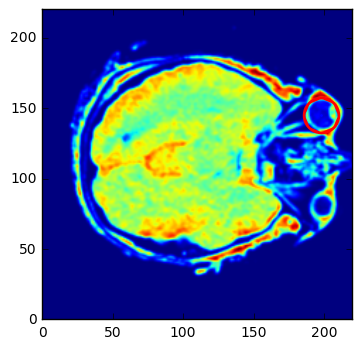

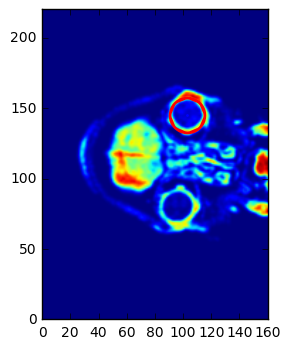

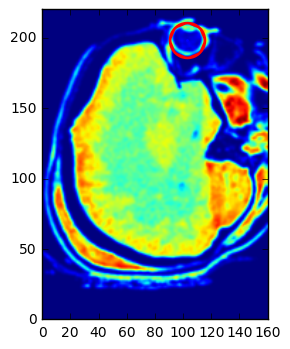

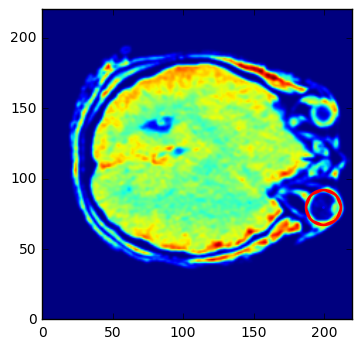

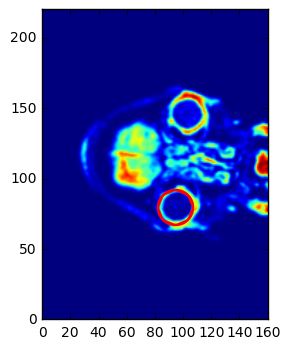

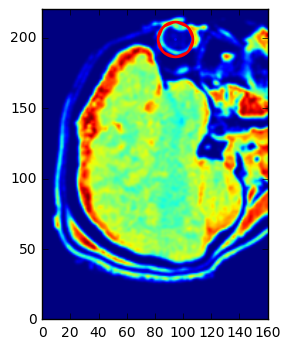

In [47]:
fer.check_coords(c1,c2,array_eyes)

In [48]:
angle1, angle2 = fer.angles_from_eyes(c1,c2)
_, array_visual = fer.correct_skews(angle1,angle2,array_visual)
_, array_eyes = fer.correct_skews(angle1,angle2,array_eyes)
print '{} skews corrected'.format(samp)

Sample D skews corrected


In [50]:
img = nib.Nifti1Image(array_visual, np.eye(4))
nib.save(img, '{}.nii.gz'.format(samp))

In [51]:
samp

'Sample D'